In [1]:
#import necessary libraries before we start the project
from scipy.fft import fft, fftfreq, fftshift, ifft, ifftshift, fft2, ifft2
import numpy as np 
import matplotlib.pyplot as plt

## Some useful definitions
- A function, $f: \mathbb{R} \rightarrow \mathbb{C} $, is periodic with period T if 
$$ f(x) = f(x + T) \quad \forall \quad x \in \mathbb{R}$$
- Set of square integrateable functions: 
$$L^2(\mathbb{T}):= \biggl\{f: \mathbb{T} \rightarrow \mathbb{R} \bigg| \int_0^1 |f(x)|^2 dx < \infty \biggr\}$$

- Inner product of two functions $f,g \in L^2(\mathbb{T})$
$$ \langle f, g \rangle = \int_0^1 f(x) \cdot \overline{g(x)} dx$$



## Task 1: The (discrete) Fourier transform

### Task 1 a
We will now consider the functions $e^{2 \pi k i x}, k \in \mathbb{Z}, x \in \mathbb{T}$, and look at their innerproduct. First when $k \neq h$:

$$ 
\langle e^{2 \pi k i \cdot }, e^{2 \pi h i \cdot} \rangle = \int_0^1 e^{2 \pi k i x} \cdot \overline{e^{2 \pi h i x}} dx = \int_0^1 e^{2 \pi (k-h) i x}  dx = \frac{1}{k-h}\bigr[ e^{2 \pi (k-h) i x} \bigl]_0^1 
$$

Since k and h are integers then $k-h$ is also an integer. This simplifies our integral:

$$ 
\langle e^{2 \pi k i \cdot }, e^{2 \pi h i \cdot} \rangle = \frac{1}{k-h}\bigr[ e^{2 \pi (k-h) i \cdot } - e^{0}\bigl]  = \frac{1}{k-h}\bigr[ 1 - 1\bigl] = 0,  
$$

We also have to look at the case where k = h:

$$ 
\langle e^{2 \pi k i \cdot }, e^{2 \pi h i \cdot} \rangle =  \int_0^1 e^{2 \pi k i x} \cdot \overline{e^{2 \pi k i x}} dx  = \int_0^1 1 dx = 1 
$$

In conclusion: 

$$
\langle e^{2 \pi k i \cdot }, e^{2 \pi h i \cdot} \rangle = \biggl\{
\begin{array}{ll}
      1 & k = h \\
      0 & k \neq h \\
\end{array}
$$ 

### Task 1 b
Furthermore we want to consider the functions on the form $\sqrt{2} \sin(2 \pi m x), m = 1,2,...$, $\cos(2 \pi 0 x)$ and $\sqrt{2} \cos(2 \pi n x), n = 1,2,...$. If we look at the innerproduct between these functions we can show that they from an orthonormal system of functions: 

Before we derive the innerproduct it can be useful to look up some trigonometric identitites. 

$$
\sin(\alpha \pm \beta) = \sin(\alpha) \cos(\beta) \pm \cos(\alpha)\sin(\beta), \quad
\cos(\alpha \pm \beta) = \cos(\alpha) \cos(\beta) \mp \sin(\alpha)\sin(\beta)
$$

From these identities we get the following useful formulas:

$$
\Rightarrow \sin(\alpha + \beta) + \sin(\alpha - \beta) = 2 \sin(\alpha) \cos(\beta)
$$

$$
\Rightarrow \cos(\alpha + \beta) + \cos(\alpha - \beta) = 2 \cos(\alpha) \cos(\beta)
$$

$$
\Rightarrow \cos(\alpha - \beta) - \cos(\alpha + \beta) = 2 \sin(\alpha) \sin(\beta)
$$



We start with the innerproduct between $\sin(2 \pi m x)$ and  $\sqrt{2} \cos(2 \pi n x)$ with $n\in {1,2,...}$ and  $m \in 0,1,..$ 
$$ 
\langle \sqrt{2} \sin(2 \pi n \cdot), \sqrt{2} \cos(2 \pi n \cdot) \rangle =  \int_0^1 \sqrt{2} \sin(2 \pi n x)\cdot \sqrt{2} \cos(2 \pi m x)  dx  =  \int_0^1 \bigl(\sin( 2 \pi n x + 2 m pi x) + \sin(2 \pi n x - 2 m \pi x) \bigr)dx = -\biggl[ \frac{\cos(2 \pi (n+m) x )}{2 \pi (n+m)} + \frac{\cos(2 \pi (n- m) x )}{2 \pi (n-m)} \biggr]_0^1 = -\biggl[ \frac{1}{2 \pi (n+m)} + \frac{1}{2 \pi (n-m)}- \left(\frac{1}{2 \pi (n+m)} + \frac{1}{2 \pi (n-m)}\right) \biggr] = 0, (n \neq m)
$$

If $n = m$
$$
\langle \sqrt{2} \sin(2 \pi m \cdot), \sqrt{2} \cos(2 \pi n \cdot) \rangle =  \int_0^1 \sqrt{2} \sin(2 \pi m x)\cdot \sqrt{2} \cos(2 \pi m x)  dx  =  \int_0^1 \bigl(\sin( 2 \pi m x + 2 m pi x) + \sin(2 \pi m x - 2 m \pi x) \bigr)dx = \int_0^1 \bigl(\sin( 2 \pi m x + 2 m pi x) dx = -\left[\frac{sin(4 \pi m x)}{4 \pi} \right]_0^1 = 0
$$

$$
\Rightarrow \langle \sqrt{2} \sin(2 \pi n \cdot), \sqrt{2} \cos(2 \pi n \cdot) \rangle = 0, n \in \{ 1,2,...\}, m \in \{0,1,...\}
$$

Now we have to look at the innerproduct $\langle \sqrt{2} \sin(2 \pi m \cdot), \sqrt{2} \sin(2 \pi m \cdot) \rangle$ with $m,n \in \{1,2,...\}$

$$
\langle \sqrt{2} \sin(2 \pi n \cdot), \sqrt{2} \sin(2 \pi m \cdot) \rangle = \int_0^{1} \sqrt{2} \sin(2 \pi m x ) \sqrt{2} \sin(2 \pi m x) dx = \int_0^{1} \bigl(\cos(2 \pi m x-2 \pi n x ) - \cos(2 \pi m + 2 \pi n x ) \bigr) dx = \biggr[ \frac{\sin(2 \pi m x-2 \pi n x )}{2 \pi (n-m)} - \frac{\sin(2 \pi m + 2 \pi n x )}{2 \pi (n+m)} \biggl]_0^1 = 0 , (n \neq m)
$$
If $n = m$
$$
\langle \sqrt{2} \sin(2 \pi m \cdot), \sqrt{2} \sin(2 \pi m \cdot) \rangle = \int_0^{1} \sqrt{2} \sin(2 \pi m x ) \sqrt{2} \sin(2 \pi m x) dx = \int_0^{1} \bigl(\cos(2 \pi m x-2 \pi m x ) - \cos(2 \pi m + 2 \pi m x ) \bigr) dx = 
\int_0^{1} \bigl(1 - \cos(4 \pi m)\bigl) dx = \biggr[ x - \frac {\sin(4 \pi x)}{4 \pi}\biggl]_0^1 = 1
$$

$$
\Rightarrow \langle \sqrt{2} \sin(2 \pi n \cdot), \sqrt{2} \sin(2 \pi m \cdot) \rangle = \biggl\{
\begin{array}{ll}
0 & m \neq n \\
1 & m = n \\
\end{array} \quad  m,n \in \{1,2,...\}
$$


Lastly we have to look at the innerproduct for $\langle \sqrt{2} \cos(2 \pi m \cdot), \sqrt{2} \cos(2 \pi m \cdot) \rangle$ with $m,n \in \{0,1,2,...\}$

$$
\langle \sqrt{2} \cos(2 \pi n \cdot), \sqrt{2} \cos(2 \pi m \cdot) \rangle = \int_0^{1} \sqrt{2} \cos(2 \pi m x ) \sqrt{2} \cos(2 \pi m x) dx = \int_0^{1} \bigl(\cos(2 \pi m x-2 \pi n x ) - \cos(2 \pi m + 2 \pi n x ) \bigr) dx = \biggr[ \frac{\sin(2 \pi m x-2 \pi n x )}{2 \pi (n-m)} - \frac{\sin(2 \pi m + 2 \pi n x )}{2 \pi (n+m)} \biggl]_0^1 = 0 , (n \neq m)
$$

If $m = n \neq 0$
$$
\langle \sqrt{2} \cos(2 \pi n \cdot), \sqrt{2} \cos(2 \pi n \cdot) \rangle = \int_0^{1} \sqrt{2} \cos(2 \pi n x ) \sqrt{2} \cos(2 \pi n x) dx = \int_0^{1} \bigl(\cos(2 \pi n x-2 \pi n x ) - \cos(2 \pi n + 2 \pi n x ) \bigr) dx =
\int_0^1 \bigl(1 - \cos(4 \pi x) \bigr) dx = \biggl[x - \frac {\sin(4 \pi x)}{4 \pi} \biggr]_0^1 = 1 
$$

If $m = n = $
$$
\langle \sqrt{2} \cos(2 \pi n \cdot), \sqrt{2} \cos(2 \pi n \cdot) \rangle = \langle \sqrt{2}, \sqrt{2} \rangle = 2 \cdot \int_0^1 1 dx = 2 
$$

$$
\Rightarrow \langle \sqrt{2} \cos(2 \pi n \cdot), \sqrt{2} \cos(2 \pi m \cdot) \rangle = \Biggl\{ 
\begin{array}{ll}
0 & m \neq n, \\
1 & m = n \neq 0 \\
2 & m = n = 0
\end{array}
$$

### Task 1 c 

Now we want to introduce two spaces for Fourier series. There are two ways to define them. And with our previous results we want to show that the two definition are identical. 
$$
\mathcal{T_n}:= \text{span}(e^{-2 \pi i n \cdot}, ..., e^{2 \pi i n \cdot}) = \biggl\{f\big|f(x) = \sum_{k = -n}^n c_k e^{2 \pi i k x}, \text{where } c_{-n},..., c_{n} \in \mathbb{C} \biggr\}
$$
We restrict the coefficients such that $c_k = \overline{c_{-k}}, k = 0,...,n$ 
$$
\mathcal{S_n}:= \text{span}(\cos(0), \cos(2 \pi \cdot), ..., \cos(2 \pi n \cdot), \sin(2 \pi \cdot), ..., \sin(2 \pi n \cdot)) 
$$

$$
= \biggl\{f\big|f(x) = \frac{a_0}{2} + \sum_{k=1}^n a_k \cos(2 \pi k x) + b_k \sin(2 \pi k x), \text{where } a_{0}, ..., a_{n}, b_1,...,b_{n} \in \mathbb{R}\biggr\}
$$

Note! All the elements in $\mathcal{T_n}$ are orthonormal. This was shown in task 1a. 
It is also possible to find a orthonormal basis for $\mathcal{S_n}$. If we use the other orthonormal system we found in task 1b we have a orthonormal basis for $\mathcal{S_n}$

$$
\mathcal{B} = \{1\} \cup \{\sqrt{2}\sin(2 \pi mx) | m = 1,2,...\} \cup \{\sqrt{2}\cos(2 \pi nx) | n = 1,2,...\}
$$

To show that $\mathcal{T_n}$ and $\mathcal{S_n}$ are the same we use Eulers identity and symmetry of cosine and sinus:

$$
cos(-x) = x,\\ sin(-x) = - sin(x),\\e^{n x i} = \cos{n x} + \mathcal{i}\sin{n x} \\
\Rightarrow e^{2 \pi n x i} + e^{-2 \pi n x i} = 2\cos{2 \pi n x},\quad e^{2 \pi n x i} - e^{- 2 \pi n x i} = 2 \mathcal{i}\sin{2 \pi n x} 
$$
If we now rearrange the sum in $\mathcal{T_n}$: 
$$
\mathcal{T_n}:= \biggl\{f\big|f(x) = \sum_{k = 0}^n c_{k} e^{2 \pi i k x} + c_{-k} e^{-2 \pi i k x}, \text{where } c_{-n},..., c_{n} \in \mathbb{C}\biggr\} 
$$
Now we see that 
$$
c_{k} e^{2 \pi i k x} + c_{-k} e^{-2 \pi i k x}  = c_{k} \cos(2 \pi k x) + c_{k}  i\sin(2 \pi k x) + c_{-k}\cos(2 \pi k x) - c_{-k} i \sin(2 \pi k x)= (c_{k} + c_{-k})2 \cos(2 \pi k x) +(c_{k} - c_{-k})2 i\sin(2 \pi k x)
$$

From the restriction of $c_k$ we have that $a_k = 2(c_k + \overline{c_{k}}) \in \mathbb{R}$  and $b_k = (c_k - \overline{c_{k}})\cdot 2 i  \in \mathbb{R}$. Which implies that 

$$
c_{k} e^{2 \pi i k x} + c_{-k} e^{-2 \pi i k x} = a_k \cos(2 \pi x) + b_k \sin(2 \pi x)
$$
$$\Rightarrow \mathcal{T_n}:= \biggl\{f\big|f(x) = \sum_{k = 0}^n a_k \cos(2 \pi x) + b_k \sin(2 \pi x), \text{where } a_0,...a_n, b_0,...,b_n \in \mathbb{R}\biggr\} 
$$
Which implies that  $\mathcal{T_n} = \mathcal{S_n}$. Since the spaces are equal thet must have the same number of dimensions. The basis that we found earlier have $2n + 1$ lineraly independent elements which means that we have $2 n +1$ dimensions for  $\mathcal{T_n}$ and $\mathcal{S_n}$

### Task 1 d 
Until now we have only stated that $a_k, b_k \in \mathbb{R}$ without any concrete way to compute them. We will now introduce a way to compute them. Lets look at the following innerpoduct where $f \in \mathcal{S_n}$:
$$
\langle f, \cos(2 \pi k \cdot)\rangle = \int_{-\frac{1}{2}}^{\frac{1}{2}}f(x) \cos(2 \pi k x) dx = 
\int_{-\frac{1}{2}}^{\frac{1}{2}}(\frac{a_0}{2} + \sum_{l=1}^n a_l \cos(2 \pi l x) + b_k \sin(2 \pi l x))\cdot \cos(2 \pi k x) dx 
$$
$$
= (\int_{-\frac{1}{2}}^{\frac{1}{2}} \frac{a_0}{2} \cdot \cos(2 \pi k x )dx  + \sum_{l=1}^n \biggl( \int_{-\frac{1}{2}}^{\frac{1}{2}}a_l \cos(2 \pi l x) \cdot \cos(2 \pi k x) dx  + b_l \int_{-\frac{1}{2}}^{\frac{1}{2}} \sin(2 \pi l x)\cdot \cos(2 \pi k x) dx \biggr)
$$
All of these integrals are just the innerproducts we computed earlier. So all the integrals go to 0 except the one where $k = l \neq = 0 $ 

$$
 \langle f, \cos(2 \pi k \cdot)\rangle = a_k\int_{-\frac{1}{2}}^{\frac{1}{2}} \cos^2(2 \pi k x) dx = \frac{a_k}{2}
$$

When k = 0:

$$
 \langle f, \cos(2 \pi 0 \cdot)\rangle = \int_{-\frac{1}{2}}^{\frac{1}{2}} \frac{a_0}{2}dx = \frac{a_0}{2}
$$

$$
\Rightarrow a_k = 2\langle f, \cos(2 \pi k \cdot)\rangle, \quad k = 0,1,\dots
$$


For $b_k$ it follows the exact same steps. But instead we look at the innerproduct for $\langle f, \sin(2 \pi k \cdot)\rangle$
$$
\langle f, \sin(2 \pi k \cdot)\rangle = \int_{-\frac{1}{2}}^{\frac{1}{2}}f(x) \sin(2 \pi k x) dx = 
\int_{-\frac{1}{2}}^{\frac{1}{2}}(\frac{a_0}{2} + \sum_{l=1}^n a_l \cos(2 \pi l x) + b_k \sin(2 \pi l x))\cdot \sin(2 \pi k x) dx 
$$

$$
= (\int_{-\frac{1}{2}}^{\frac{1}{2}} \frac{a_0}{2} \cdot \sin(2 \pi k x )dx  + \sum_{l=1}^n \biggl( \int_{-\frac{1}{2}}^{\frac{1}{2}}a_l \cos(2 \pi l x) \cdot \sin(2 \pi k x) dx  + b_l \int_{-\frac{1}{2}}^{\frac{1}{2}} \sin(2 \pi l x)\cdot \sin(2 \pi k x) dx \biggr)
$$
All of these integrals are just the innerproducts we computed earlier. So all the integrals go to 0 except the one where $k = l$ 

$$
 \langle f, \sin(2 \pi k \cdot)\rangle = b_k\int_{-\frac{1}{2}}^{\frac{1}{2}} \sin^2(2 \pi k x) dx = \frac{b_k}{2}
$$
$$
\Rightarrow b_k = 2\langle f, \sin(2 \pi k \cdot)\rangle  \quad k = 1,\dots
$$

### Task 1e 
Now we want a way to compute $c_k$ numerically. Befor we do that we will state without proving the following:
$$
c_k = c_k(f) = \langle f, e^{2 \pi i k\cdot} \rangle = \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) e^{2 \pi i x} dx = \int_{0}^{1} f(x) e^{2 \pi i x} dx
$$ 
We can shift the integration boundaries since f is periodic. To prove this relation we do exactly the same as in the previous task, but for $f \in \mathcal{T_n}$.

To compute $c_k$ numerically we will use the composite trapezodial rule on the discrete values $x_0,..., x_{N-1}, x_j = \frac{j}{N}$ and $f$ is periodic with period $b-a$.
$$
\int_a^b f(x) dx = \frac{b-a}{N}\sum_{j = 0}^{N-1}\frac{f(x_j) + f(x_{j+1})}{2}
$$

$$
c_k =  \int_{0}^{1} f(x) e^{2 \pi k i x} dx = \frac{1}{N}\sum_{j = 0}^{N-1}\frac{f(x_j)\cdot e^{2 \pi k i x_j} + f(x_{j+1}) \cdot e^{2 \pi k i x_{j+1}}}{2} = \frac{1}{2 N}\sum_{j = 0}^{N-1}f_j\cdot e^{ \frac{2 \pi k i j}{N}} + fx_{j+1} \cdot e^{\frac{2 \pi k i (j+1)}{N}} = \frac{1}{2 N}\biggl[\sum_{j = 0}^{N-1}f_j\cdot e^{\frac{2 \pi k i  j}{N}} + \sum_{j = 1}^{N}fx_{j} \cdot e^{ \frac{2 \pi k i j}{N}}\biggr] = \frac{1}{2 N}\biggl[f_0 + 2 \sum_{j = 1}^{N-1}f_j\cdot e^{ \frac{2 \pi i j}{N}} + f_N e^{-2 \pi k i } \biggr]
$$
Since $k \in \mathbb{Z}$, $e^{-2 \pi i k}$ = 1. And since f is 1 perodic then $f_0 = f_N$. Hence: 

$$
c_k = \frac{1}{2 N}\biggl[f_0 + 2 \sum_{j = 1}^{N-1}f_j\cdot e^{ \frac{2 \pi k ij}{N}} + f_N\biggr] = \frac{1}{2 N}\biggl[2 \sum_{j = 1}^{N-1}f_j\cdot e^{ \frac{2 \pi k i j}{N}} \biggr]= \frac{1}{N} \sum_{j = 1}^{N-1}f_j\cdot e^{ \frac{2 \pi k i j}{N}} 
$$

If $\hat{f_{k+N}} = \hat{f_k}$, then $\hat{f_k}$ is periodic 

$$
\hat{f_{k+N}} = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{\frac{- 2 \pi i j (k+N)}{N}} =\frac{1}{N} \sum_{j=0}^{N-1} f_j e^{- 2 \pi i j(\frac{k}{N}+1)} = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{- 2 \pi i j(\frac{k}{N})}\cdot e^{- 2 \pi i j} = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{- 2 \pi i j(\frac{k}{N})} = \hat{f_k}
$$

$$
\Rightarrow f_k \text{ is periodic}
$$



### Task 1 f 
We wil now look at the following sum where $N \in \mathbb{N}$ and $k \in \mathbb{Z}$:
$$
S_k = \frac{1}{N}\sum_{j=0}^{N-1} e^{\frac{-2 \pi i j k}{N}} =\frac{1}{N}\sum_{j=0}^{N-1} \bigl(e^{\frac{-2 \pi i k}{N}}\bigr)^j
$$

We notice that the sum can be written as a geometric series, and we set $ w_k = e^{\frac{-2 \pi i k}{N}}$:
$$
S_k = \frac{1}{N}\sum_{j=0}^{N-1} {w_k}^j = \frac{1}{N}\frac{{w_k}^N - 1}{w_k -1}
$$

If $k\mod{N} \equiv 0$ then $k$ can be written as $k = n\cdot N, n \in \mathbb{Z}$. Which means that $w_k = e^{2 \pi i n }$ = 1. If we now look at the sum:

$$
S_k = \frac{1}{N} \sum_{j=0}^{N-1}1 = \frac{N}{N} = 1, \text{ when } k\mod{N}  \equiv 0
$$

When  $k \mod{N} = r, r \in \mathbb{Z} \quad \Rightarrow \quad k = n N + r  \quad n,r \in \mathbb{Z}$ \ $0$. 

Then $w_k = e^{\frac{-2 \pi i (n N + r)}{N}} = 1 \cdot e^{\frac{-2 \pi  r}{N} }$. So the sum is then:

$$
S_k =  \frac{1}{N}\frac{{w_k}^N - 1}{w_k -1} = \frac{1}{N}  \frac{\bigl(e^{\frac{-2 \pi i r}{N}} \bigr)^N - 1}{e^\frac{-2 \pi i r}{N} -1} = \frac{1}{N} \frac{1 - 1}{e^\frac{-2 \pi i r}{N} -1} = 0
$$

Which leads ut to our result 
$$
\frac{1}{N}\sum_{j=0}^{N-1} e^{\frac{-2 \pi i j k}{N}} = \biggl\{ \begin{array}{ll} 1 & k \mod{N} \equiv 0   \\ 0 & \text{else} \end{array}
$$

### Task 1 g 
We will now introduce the circulant matrix and its relation to the discrete Fourier transform. First we define the circulant matrix 

$$
circ({\bf a}) = \bigl(a_{k-l \mod{N}} \bigr)_{k,l = 0}^{N-1} = \begin{pmatrix} a_0 & a_{N-1} & \dots & a_2 & a_1 \\
a_1 & a_0 & \dots & a_3 & a_2 \\ \vdots &  & \ddots &  & \vdots \\ a_{N-1} & a_{N-2} & \dots & a_1 & a_0 \end{pmatrix}
$$


Now we want to define the the discrete Fourier transform, $\mathcal{F_n}$, in a matrix

$$
\mathcal{F_n} = \bigl(w_{k,l} \bigr)_{k,l = 0}^{N-1} = \bigl(e^{-2 \pi i k l/N} \bigr)_{k,l = 0}^{N-1} 
$$

And the conjugate discrete Fourier transfrom

$$
\overline{\mathcal{F_n}} = \bigl(\overline{w_{k,l}} \bigr)_{k,l = 0}^{N-1} = \bigl(e^{2 \pi i k l/N} \bigr)_{k,l = 0}^{N-1} 
$$

For a signal $\bf{a}$ $ = (a_0, a_1, \dots, a_{N-1})^T$ we have that 

$$\hat{a} = \mathcal{F_n} a = (\hat{a_0}, \hat{a_1}, \dots,\hat{a_N})^T, \quad \hat{a_k} = \sum_{j=0}^{N-1}a_j e^{-2 \pi i j k/N}
$$

Further we want to compute the matrix multiplication between diag($\bf{\hat{a}}$) and $\mathcal{F_n}$:

$$
\text{diag}(\hat{a}) \mathcal{F_n} = \bigl(\hat{a_k} w_{l,k} \bigr)_{l,k = 0}^{N-1} \quad 
$$

$$\Rightarrow \quad \overline{\mathcal{F_n}}\text{diag}(\hat{a}) \mathcal{F_n} = \bigl( c_{l,r} \bigr)_{l,r=0}^{N-1} = \bigl(\sum_{k=0}^{N-1} \overline{w_{l,k}}\cdot \hat{a_k}e^{-2 \pi i k r/N} \bigr)_{l,r = 0}^{N-1} =
\bigl(\sum_{k=0}^{N-1} \overline{w_{l,k}}\cdot \sum_{j=0}^{N-1}a_j e^{-2 \pi i j k/N} e^{-2 \pi i k r/N} \bigr)_{l,r = 0}^{N-1} =
\bigl(\sum_{k=0}^{N-1} \sum_{j=0}^{N-1} e^{2 \pi l k /N}\cdot a_j e^{-2 \pi i j k/N} e^{-2 \pi i k r/N} \bigr)_{l,r = 0}^{N-1}
= \bigl(\sum_{j=0}^{N-1} a_j \sum_{k=0}^{N-1} e^{2 \pi (l k -j k - k r)/N}\bigr)_{l,r = 0}^{N-1}
= \bigl(\sum_{j=0}^{N-1} a_j \sum_{k=0}^{N-1} e^{2 \pi (l  -j  -  r) k/N}\bigr)_{l,r = 0}^{N-1}
$$
By the result in task 1 f
$$
\Rightarrow \sum_{k=0}^{N-1} e^{2 \pi (l  -j  -  r) k/N}\bigr)_{l,r = 0}^{N-1} = \biggl\{ \begin{array}{ll} N & l -j - r \mod{N}\equiv 0 \\ 0 & \text{else}\end{array} \Rightarrow j = r - l \mod{N}
$$
$$
\Rightarrow c_{l,r} = N \cdot a_{l-r \mod{N}} \Rightarrow \frac{c_{l,r}}{N} = \cdot a_{l-r \mod{N}}
$$
$$
\Rightarrow
\frac{1}{N} \overline{\mathcal{F}}_N \text{diag}(\hat{a})\mathcal{F}_N = circ(\bf{a})
$$

This result tells us that $\mathcal{F}_N$ diagonalizes the circulant matrix. Which means that $\frac{1}{N}\mathcal{F}_N$ is the inverse of $\mathcal{F}_N$

### Task 1 h 
We now want to look at the plots of the fourier transforms 

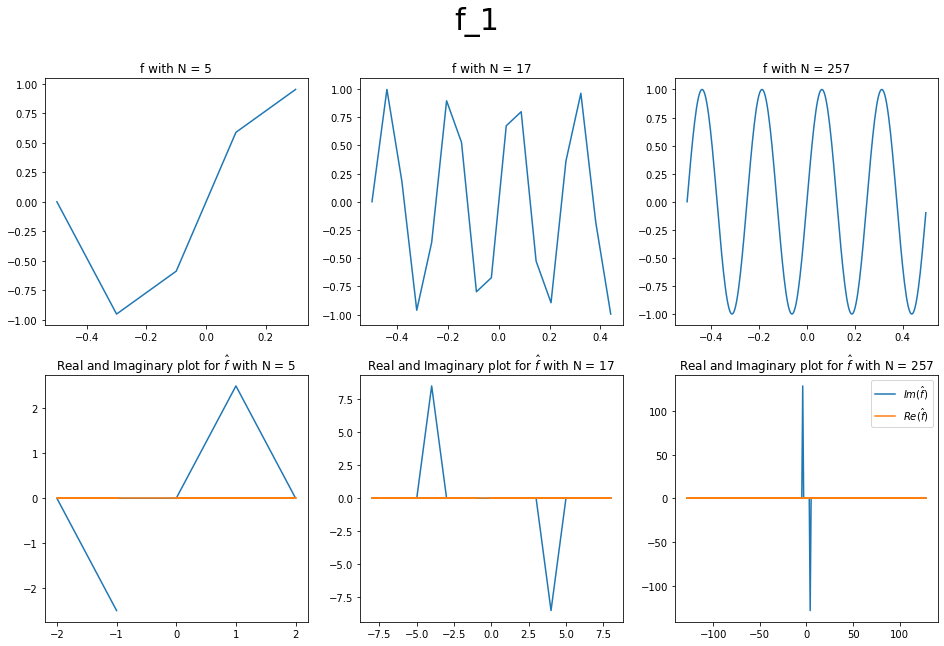

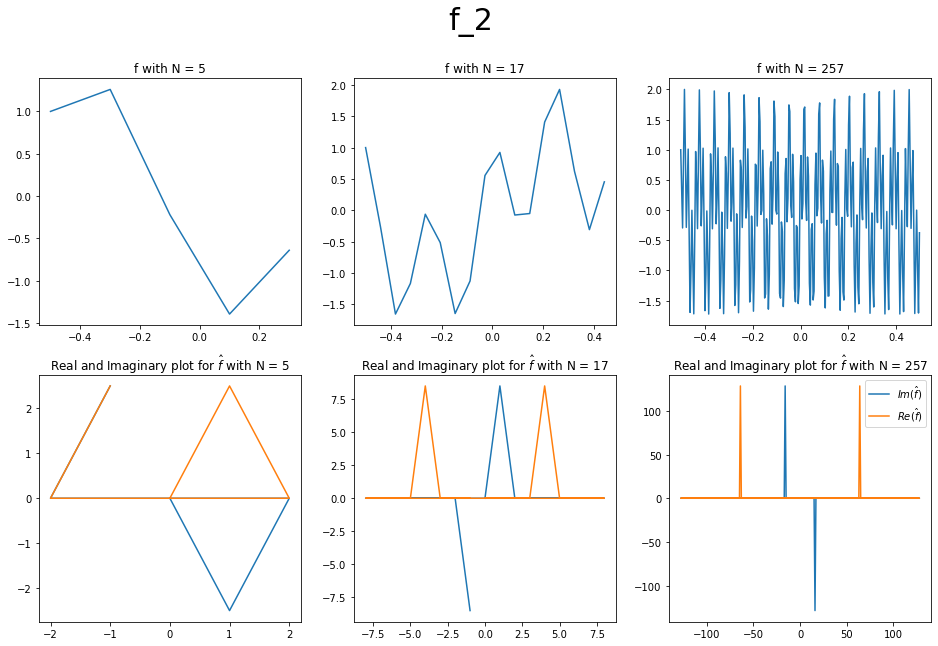

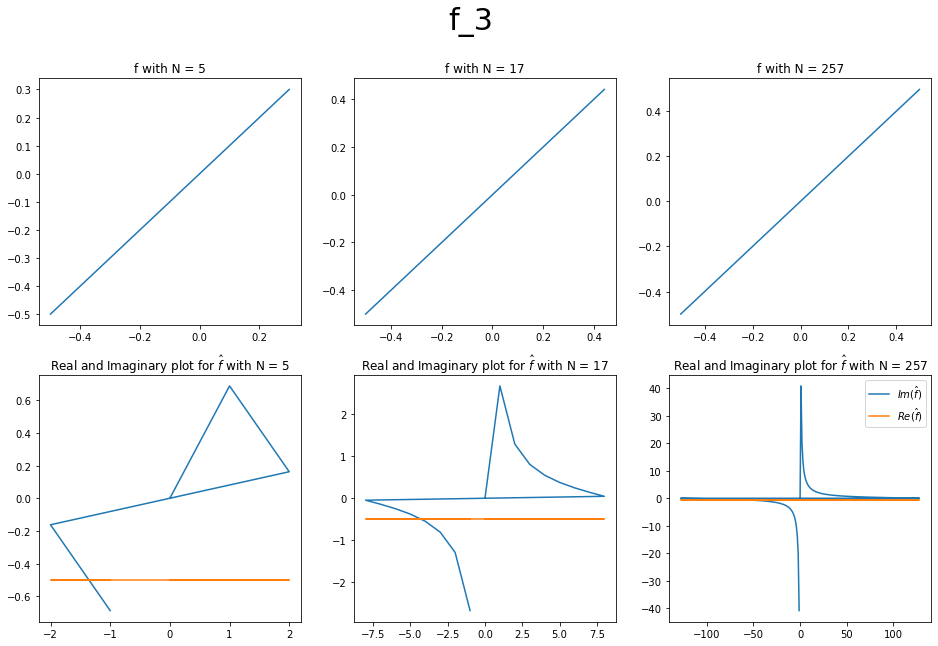

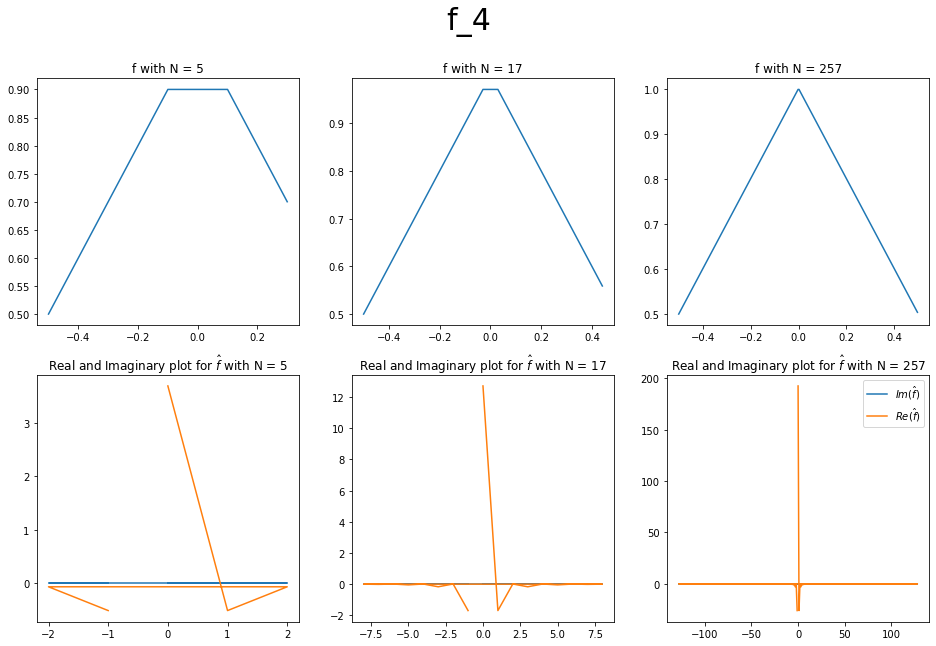

In [2]:
def transform(f, N, start = 0.0):
    '''
    input:
        - f: function that we want to compute discrete fourier transform of. f has periodicity 1 
        - N: number of samples 
        - start: initial value for x
    output:
        - x: x-values sampled from start to start + 1 
        - f(x): y-values over x-values 
        - fft(f(x)): the discrete Fourier transfrom of f(x)
        - xf: frequency domain 
    '''
    if start == 0.0: #if test that starts at either 0 or specified startvalue
        x = np.linspace(0,1, N, endpoint = False) #generate x-values, use endpoint = False to remove last element
        xf = fftfreq(N,1/N) #get frequency domain 
        return x, f(x), fft(f(x)), xf #return x-values, y-values, DFT, frequency domain
    else:
        x = np.linspace(start, start+1, N, endpoint = False) #x-values but different start 
        xf = fftfreq(N,1/N) #frequency domain
        return x, f(x), fft(f(x)), xf #return x-values, y-values, DFT, frequency domain
    

#define different functions we want to look at 
def f_1(x):
    return np.sin(8 * np.pi* x)

def f_2(x):
    return np.sin(32 *np.pi * x) + np.cos(128 * np.pi * x)

def f_3(x):
    return x 

def f_4(x):
    return 1 - abs(x) 

def plot_dft(f, N = [5,17,257], start = 0.0 ):
    '''
    function that plots a function,f, and its discrete Fourier transform's for differeny number of samples
    input: 
        - f: function we want to plot the DFT of 
        - N: list with number of samples 
        - start: x 
    output:
        - no output 
    
    '''
    fig, ax = plt.subplots(2,3, figsize = (16,10)) #subplots 
    plt.suptitle(f'{f.__name__}', fontsize = 30) #title 
    for i in range(len(N)): #for loop that plots the function and DFT for different samples 
        n = N[i]
        x, y, yf, xf  = transform(f,n, start)
        ax[0][i].plot(x,y)
        ax[0][i].set_title(f'f with N = {n}')
        ax[1][i].plot((xf),(yf.imag), label = r'$Im(\hat{f}$)')
        ax[1][i].plot((xf),(yf.real), label = r'$Re(\hat{f}$)')
        ax[1][i].set_title(f'Real and Imaginary plot for ' + r'$\hat{f}$' + f' with N = {n}')
    plt.legend()
#plot the different functions
N = [5,17,257]
plot_dft(f_1, N, start = -1/2)
plot_dft(f_2, N, start = -1/2)
plot_dft(f_3, N, start = -1/2)
plot_dft(f_4, N, start = -1/2)

$\mathbf{f}$ approximates $f$ well when N = 257. For the other N's it is unclear to see the shape of $f$

### Task 1 i 
We now want to take a closer look at $f_2(x) = \sin(32 \pi x ) + \cos(128 \pi x), x \in \mathbb{T} \quad $

For $a_k$ and $b_k$ we see directly that  $\quad a_k = \biggl\{ \begin{array}{ll} 1 & k = 64 \\ 0 & else \end{array} \quad$ and $\quad b_k = \biggl\{ \begin{array}{ll} 1 & k = 16 \\ 0 & else \end{array}$

For $c_k$ we have to use eulers identity to get $f_2$ on its complex Fourier form:

$$
\cos(2 \pi k x) = \frac{e^{2 \pi k x}+e^{-2 \pi k x}}{2}, \sin(2 \pi k x) = \frac{e^{2 \pi k x}-e^{-2 \pi k x}}{2i} 
$$

$$
\Rightarrow \cos(128\pi x) = \frac{1}{2}e^{2 \pi 64 x}+ \frac{1}{2}e^{-2 \pi 64 x} \Rightarrow c_{64} = \frac{1}{2}, c_{-64} = \frac{1}{2}
$$

$$
\Rightarrow \sin(32\pi x) = \frac{1}{2i}e^{2 \pi 16 x} + \frac{-1}{2i}e^{-2 \pi 16 x} \Rightarrow c_{16} = \frac{1}{2i}, c_{-16} = \frac{-1}{2i}
$$

$$
\Rightarrow c_k = \left\{ \begin{array}{ll} 1/2 & k \in \{-64, 64\} \\ \frac{1}{2i} & k = 16 \\ \frac{-1}{2i} & k = -16 \\ 0 & else \end{array}\right.
$$

If we have an array with $c_k = (c_{-n}, c_{-n+1}, \dots, c_0, c_1, \dots, c_n, 0,0, \dots, 0) \in \mathbb{C}^N$ where N indicates our number of samples. If we take `fftshift` on our array c_k we will get all zeroes up to the n-th element where we have $c_{-n}$ and then $c_{-n+1}$ up to $c_{n}$ where we get zeroes til the N-th element

`fftshift(c_k)` $= (0,0,\dots, 0, c_{-n}, c_{-n+1}, \dots, c_0, c_1, \dots, c_n, 0,0, \dots, 0)$

So `fftshift` shifts our array such that it is to plot $c_k$ to a frequency domain. in other words it shifts the zero-frequency component to the center of the frequency-spectrum.

It is easy to remove the second summand in $f_2, \cos(128 \pi x)$, by modifying $\hat{f} \in \mathbb{C}^{257}$. If we set $c_{64}$ and $c_{-64}$ equal to $0$ we remove the $\cos$ part without removing any information from $\sin$ part, since it is represented with $c_{16}$ and $c_{-16}$

For $\hat{f} \in \mathbb{C}^{17}$ it is not possible. Then the second summand depends on the frequency of the first summand so we cant remove the second summand without removing part of the first summand


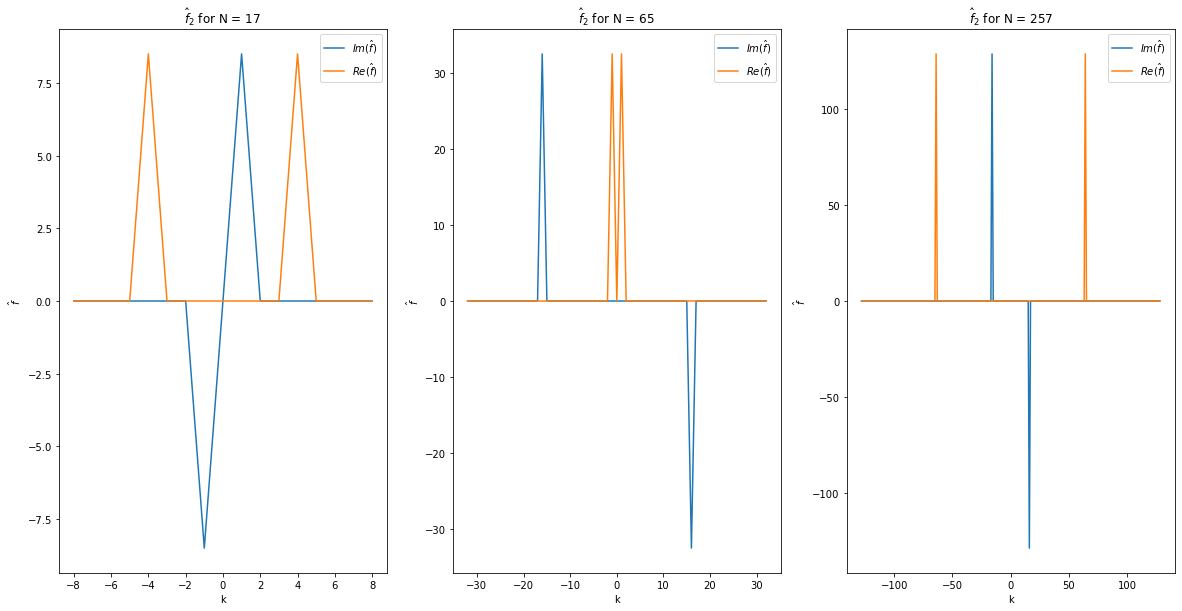

In [3]:
N = np.array([17,65,257])

fig, ax = plt.subplots(1,3, figsize = (20,10))
for i in range(len(N)): #exactly the same rutine as for for plot_dft but with fftshift implemented
    n = N[i]
    x, y, yf, xf = transform(f_2, n, start = -1/2)
    ax[i].set_title(r'$\hat{f}_2$' + f' for N = {N[i]}')
    ax[i].plot(fftshift(xf),fftshift(yf).imag, label = r'$Im(\hat{f}$)' ) #fftshift is implemented
    ax[i].plot(fftshift(xf),fftshift(yf).real, label = r'$Re(\hat{f}$)' ) #fftshift is implemented
    ax[i].set_xlabel('k')
    ax[i].set_ylabel(r'$\hat{f}$')
    ax[i].legend()


`fftshift` doesnt change our plot that much from rask 1h, but they are prettier and without unchronologic values. 

## Task 2: Signal processing 


### Task 2a: 
Before doing any kind of signal processing we want to definte continuous and discrete convulution:

**Continuous:**

Let $f,g \in L^2(\mathbb{T})$
$$
(f * g)(x) = \int_{\mathbb{T}} f(y)g(x-y) dx = \int_{0}^{1} f(y)g(x-y) dy
$$
**Discrete:**

Let **a**, **b** $\in \mathbb{R}^N$ the *cyclic convolution* of **a** and **b** is defined entry wise for all $ j = 0, \dots, N-1$ by 
$$
(a*b)_j = \sum_{k=0}^{N-1} a_k b_{j -k \mod{N}}
$$

If **a** is out inout signal and we use **b** to modify **a** using convolution we sat that **b** filters **a** our that **b** is a filter signal. 

Now lets look at that shifted signal of $b' = (b_{N-1},b_0, \dots, b_{N-2}) = b_{N - 1 + j} \text{ for } j = 0, \dots, N-1$  convoluted on **a**:
$$
(a*b')_j = \sum_{k=0}^{N-1} a_k b_{N - 1 + j -k \mod{N}} =\sum_{k=0}^{N-1} a_k b_{j -k - 1\mod{N}}
$$

### Task 2b 
We know want to look at the fourier coefficient of two convoluted functions $f,g \in L_1(\mathbb{T})$:

$$
c_k(f * g) = \langle (f*g), e^{-2 \pi k \cdot}\rangle = \int_0^1 (f*g) e^{-2 \pi k \ x} dx  =\int_0^1  \int_{0}^{1} f(y)g(x-y) \cdot e^{-2 \pi k \ x} dy dx \int_0^1  = \int_{0}^{1} f(y)g(x-y) \cdot e^{-2 \pi k \ x} dx dy 
$$

Substitution: $w = x - y \Rightarrow dw = dx$  and $ x = w + y$ 

$$
c_k(f * g)  = \int_0^1  \int_{-y}^{1-y} f(y)g(w) \cdot e^{-2 \pi k (w + y)} dw dy = \int_0^1  f(y) e^{-2 \pi k  y}\int_{-y}^{1-y} g(w) \cdot e^{-2 \pi k  w} dw  dy = 
$$

$$
\int_0^1  f(y) e^{-2 \pi k y} dy \int_{-y}^{1-y} g(w) \cdot e^{-2 \pi k w} dw  
$$ 

Since g and $e^{-2 \pi k \ w}$ is 1 periodic we can change the limits from $\{-y, 1-y\}$ to $\{0,1\}$

$$
c_k(f * g)  = \int_0^1  f(y) e^{-2 \pi k y} dy \int_{0}^{1} g(w) \cdot e^{-2 \pi k w} dw = c_k(f) \cdot c_k(g)
$$

Now we want to look at the fourier coefficient of two convoluted signals $a, b \in \mathbb{R}^N$:

$$
\hat{(a*b)} = \mathcal{F}_N \cdot (a*b) = \left(\sum_{j = 0}^{N-1} \mathcal{F}_{n,j}(a*b)_j\right)_{n=0}^{N-1}
=\left(\sum_{j = 0}^{N-1} e^{-2 \pi i n j} \sum_{k=0}^{N-1} a_k b_{j -k \mod{N}}\right)_{n=0}^{N-1}
=\left(\sum_{j = 0}^{N-1} e^{-2 \pi i n (j-k +k)} \sum_{k=0}^{N-1} a_k b_{j -k \mod{N}}\right)_{n=0}^{N-1}
$$

$$
=\left(\sum_{j = 0}^{N-1} e^{-2 \pi i n k} \sum_{k=0}^{N-1} a_k b_{j -k \mod{N}} \cdot e^{-2 \pi i n (j-k)}\right)_{n=0}^{N-1}
= \left(\sum_{j = 0}^{N-1}\sum_{k=0}^{N-1} e^{-2 \pi i n k}  a_k b_{j -k \mod{N}} \cdot e^{-2 \pi i n (j-k)}\right)_{n=0}^{N-1}
= \left(\sum_{k = 0}^{N-1}a_k e^{-2 \pi i n k} \sum_{j=0}^{N-1}  b_{j -k \mod{N}} \cdot e^{-2 \pi i n (j-k)}\right)_{n=0}^{N-1} = \left(\hat{a_n} \cdot \hat{b_n}\right)_{n=0}^{N-1}
$$

$$
\Rightarrow \hat{(a*b)} = \hat{a} \circ \hat{b}
$$
$\circ$ indicates element wise multiplication. This result helps us to compute circ(a) $\cdot$ circ(b)

$$
circ(a) \cdot circ(b) = \frac{1}{N}\overline{\mathcal{F}_n} diag(\hat{a}) \mathcal{F}_n \cdot \frac{1}{N}\overline{\mathcal{F}_n} diag(\hat{b}) \mathcal{F}_n 
$$

Using that $\frac{1}{N}\overline{\mathcal{F}_n}  \mathcal{F}_n = \mathcal{I}_n, \quad diag(x)\cdot diag(y) = diag(x*y) \quad \text{and } \overline{(a*b)} = \hat{a} \cdot \hat{b}$

$$
circ(a) \cdot circ(b) = \frac{1}{N}\overline{\mathcal{F}_n} diag(\hat{a})\cdot  diag(\hat{b})\mathcal{F}_n 
= \frac{1}{N}\overline{\mathcal{F}_n} diag(\hat{a} \cdot \hat{b}) \cdot \mathcal{F}_n 
= \frac{1}{N}\overline{\mathcal{F}_n} diag(a * b) \cdot \mathcal{F}_n 
$$

$$
\Rightarrow circ(a) \cdot circ(b) = circ(a*b)
$$

### Task 2 c 
The dirichlet kernel is defined as the following:

$$
D_n(x) = 1 + 2\sum_{k = 1}^n \cos(2 \pi k x), \quad n \in \mathbb{N}
$$
Using $2 \cos(2 \pi k x) = e^{2 \pi i k x} + e^{-2 \pi ik x}$:

$$
D_n(x) = 1 + \sum_{k = 1}^n e^{2 \pi i k x} + e^{-2 \pi i k x} = \sum_{k=-n}^n e^{2 \pi i k x} \quad
\Rightarrow c_k = 1, \text{ when} -n \leq k \leq n \quad 
\Rightarrow \hat{d} = (1,\dots, 1) \in \mathbb{R}^{2n +1}
$$

We see that looking at the discrete fourier domain is much easier than the real domain since we only have ones in $\hat{d}$. When we have a N sampled signal the DFT of dirichlet is an array of zeroes and ones. We will have 2n +1 ones since theres are the $c_k$ stated earlier. The rest of the samples will be zero. So for a  $\hat{d} \in \mathbb{R}^N$, $\hat{d} = (0,\dots, 0, 1, \dots, 1, \dots ,1, 0, \dots, 0)$. This will make element wise multiplaction trivial and a way to remove specific frequencies. 

In [4]:
def dirichlet_coeff(N, n):
    '''
    function that computes the c_k of the Dirichlet kernel for
    input:
        - N: number of samples in signal
        - n: indicates of many c_k, ones, we have
    output:
        - d_hat: array with our c_k's 
    '''
    d_hat = np.zeros(N) #create empty array 
    d_hat[int(N/2-n):int(N/2+n)] = 1 #arrange zeroes and ones so they match with the definitin 
    return d_hat #return DFT of dirichlet kernel

### Task 2d
We will now look at the convolution between $f_2$ and the $D_{48}$ Dirichlet Kernel. We will use the result $\hat{(a*b)} = \hat{a}\circ\hat{b}$ toghether with scipy's `ifft`(inverse fourier transform) to compute the convolution. We get an interesting result

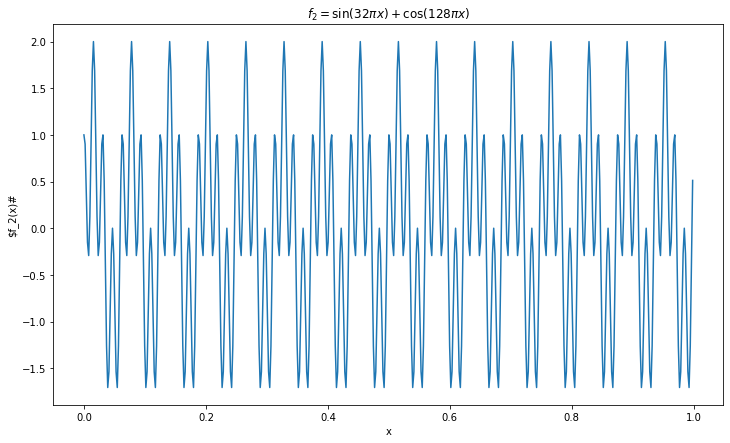

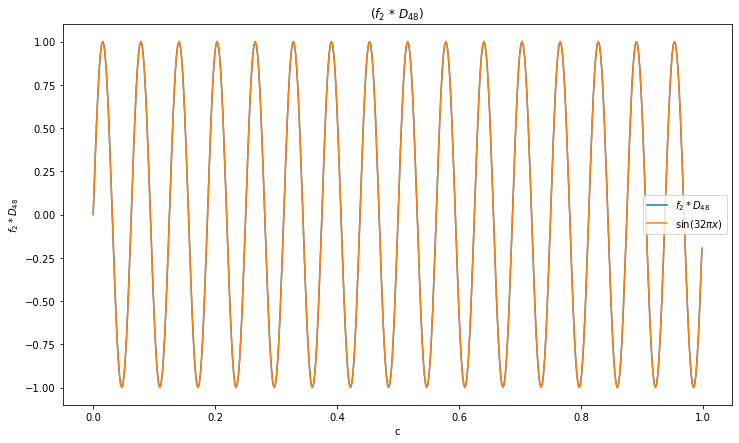

In [5]:
#task 2 d
N = 512 #number of samples 
n = 48 #number of ones in dirichlet 
x,y, yt, xt = transform(f_2, 512) #get the transform 
yt = fftshift(yt) #use fftshift for better plots 
xt = fftshift(xt) #use fftshift for better plots 

d_hat = dirichlet_coeff(N,n) #get DFT of dirichlet kernel

convolution_hat = yt*d_hat #elementwise multiplication 
convolution = ifft(fftshift(convolution_hat)) #find the convolution 

#plotting the relevant functions
plt.figure(figsize = (12,7))
plt.title(r'$f_2 = \sin(32 \pi x) + \cos(128 \pi x)$')
plt.plot(x,y)
plt.xlabel(f'x')
plt.ylabel(r'$f_2(x)#')

plt.figure(figsize = (12,7))
plt.title(r'$(f_2$ * $D_{48})$')
plt.plot(x, np.real(convolution), label = r'$f_2*D_{48}$')
plt.plot(x, np.sin(32 *np.pi *x), label = r'$\sin(32 \pi x)$')
plt.xlabel(f'c')
plt.ylabel(r'$f_2*D_{48}$')
plt.legend()

                   

After the convoltuion we see that we are left with a pure sine wave. So the cosinus part of the signal is removed by the convolution. We can genereally say that the Dirichlet kernel $D_n$ removes all frequencies greater $n$ and less than $-n$.

### Task 2e
Now we want to look at the convolution of the dirichlet kernel with a singal `project1-1e-data.csv`. We will also look at different filter **h** $= (-1,2-1,0,\dots, 0) \in \mathbb{R}^n$. We use the csv library to read out the values and store them in an array


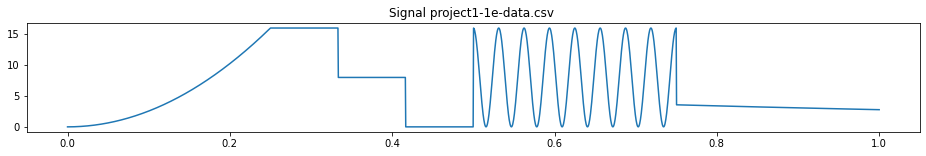

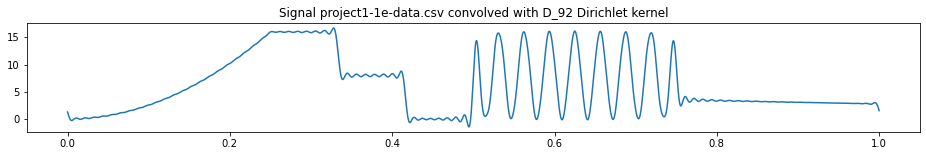

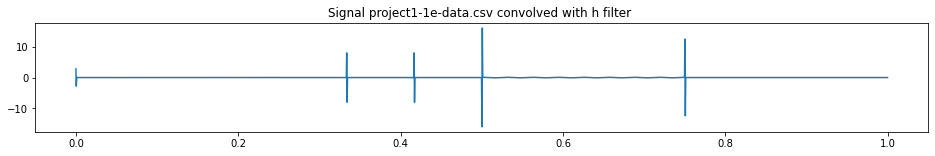

In [6]:
#2 e 
import csv 
x_data = [] #list for x values
signal_data = []  #list for signal values
with open('project1-1e-data.csv', 'r') as csv_file: #open the file 
    csv_reader = csv.reader(csv_file) #read file 
    i = 0 
    for row in csv_reader: #for loop that reads out x_data and signal_data 
        if(i>0):#trick to not read strings in the file 
            x_data.append(float(row[0]))
            signal_data.append(float(row[1]))
        i+=1 

#convert to array for better usage         
x_data_array = np.array(x_data)
signal_data_array = np.array(signal_data)

signalf = fftshift(fft(signal_data_array)) #take the DFT of the signal 

N = len(x_data_array) #number of samples 
n = 92 #number in dirichlet kernel 

d_hat = dirichlet_coeff(N,n) #get the dirichlet kernel

#make the filter defined in markdown 
h = np.zeros(N) 
h[0] = -1; h[1] = 2; h[2] = -1; 
h_hat = fftshift(fft(h))
convolution_diric = ifft(fftshift(signalf*d_hat)) #find the DFT convolution
convolution_h = ifft(fftshift(signalf*h_hat)) #find the convolution 

#plot the signal
plt.figure(figsize =(16,2))
plt.title(f'Signal project1-1e-data.csv ')
plt.plot(x_data_array, signal_data_array)

#plot the signal convoluted with dirichlet 
plt.figure(figsize =(16,2))
plt.plot(x_data_array, convolution_diric.real)
plt.title(r'Signal project1-1e-data.csv convolved with D_92 Dirichlet kernel')

#plot the signal convoluted with h 
plt.figure(figsize =(16,2))
plt.title(r'Signal project1-1e-data.csv convolved with h filter ')
plt.plot(x_data_array, convolution_h.real)

We see that the *dirichlet* filter removes the higher order frequencies of the signal and we are left with an approximation of the signal. **NOTE** the convoluted singal is continuous and we see Gibb's phenomenon at the points where the signal is discontinuous.

The **h** filter indicates where the singal is discontinuous or makes big jumps. This can be useful in audioprocessing to highlight where a signal has large sound differences. 


### Task 2f 
Since the dirichlet filter removes the higher order frequencies and keeps the lower order frequencies. The opposote of a dirichlet filter would be to remove the lower order frequencies and keep the higher order ones. To compute the fourier domain of this filter, $\hat{k}$,  we could take an array of $N$ ones $(1,1, \dots,1,1) \in\mathbb{R}^n$ and subtract the frequency domain of the dirichlet kernel, $\hat{d}$: 

$$
\hat{k}  =  (1,1,\dots,1,1)  - \hat{d}  =(1,1,\dots,1,1)  - (0,\dots, 0,1, \dots, 1, 0, \dots, 0) = (1,\dots, 1,0, \dots, 0, 1, \dots, 1)  
$$

Applying this filter to `project1-1e-data.csv` gives:

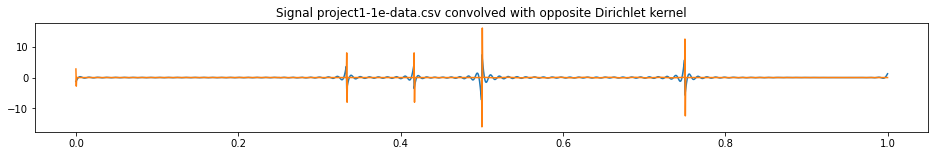

In [7]:
k_hat = np.ones(N) - dirichlet_coeff(N,n) #make opposite of dirichlet 

convolution_k = ifft(fftshift(signalf*k_hat)) #find the convolution 

#plot opposite of dirichlet with the h-filter 
plt.figure(figsize =(16,2))
plt.title(r'Signal project1-1e-data.csv convolved with opposite Dirichlet kernel')
plt.plot(x_data_array, np.real(convolution_k))
plt.plot(x_data_array, convolution_h.real)

We se that the opposite Dirichlet filter is similar to the $h$ filter. It indicates where the signal is discontinuous 

### Task 2 g
It can be useful to make a filter,*l*,  that takes out a spesific interval of frequencies, say $40 \leq |k| \leq 64$. 
Here we want to use the same principles as for a dirichlet kernel. The fourier coefficients would be defined as such:
$$
c_k = \left\{ \begin{array}{ll} 1 & -64 \leq k \leq 40 \\ 1 & 40 \leq k \leq 64  \\ 0 & else\end{array}\right.
$$
Now lets make this filter and use it on `project1-1e-data.csv`

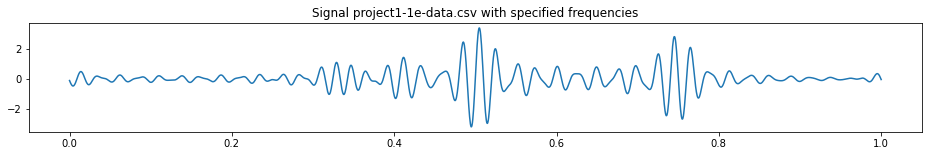

In [8]:
l_hat = np.zeros(N) #empty array 

#define where i want ones 
l_hat[int(N/2-64):int(N/2-40)] = 1 
l_hat[int(N/2+40):int(N/2+64)] = 1

convolution_l = ifft(fftshift(signalf*l_hat)) #find convolution 

#plot convolution
plt.figure(figsize =(16,2))
plt.title(r'Signal project1-1e-data.csv with specified frequencies')
plt.plot(x_data_array, np.real(convolution_l))



## Task 3: Image processing 
We now want to use the ideas from signal processing, convolution and the discrete Fourier transfrom to look at image procressing. We will specifically look at filters and ways to remove dots from half toning images. 



### Task 3a:

For a multivariate Fourier transfrom we have the following discrete way of computing it:

$$
\hat{F}_{k1,k2} := \sum_{j_1 = 0}^{N_1 -1}\sum_{j_2 = 0}^{N_2 - 1}F_{j_1,j_2} e^{-2 \pi i(j_1 k_1/N_1 + j_2 k_2/N_2)}
=\sum_{j_1 = 0}^{N_1 -1}e^{-2 \pi i(j_1 k_1/N_1)}\sum_{j_2 = 0}^{N_1-1}F_{j_1,j_2} e^{-2 \pi i(j_2 k_2/N_2)}
$$

When computing a FFT the runtime is in $\mathcal{O}(N log(N))$. When you are computing it in two dimensions you are doing a computations with runtime $\mathcal{O}(N_1 log(N_1))$, $N_2$ times. And similiarly computations with runtime $\mathcal{O}(N_2 log(N_2))$, $N_1$ times. So we have the composite runtime:

$$
N_1\mathcal{O}(N_2 \log {N_2})+ N_2 \mathcal{O}(N_1 \log{N_1})=  \mathcal{O}(N_1 N_2 \log{N_2}) + \mathcal{O}(N_2 N_1 \log{N_1}) = \mathcal{O}(logN_2^{N_1 N_2}) + \mathcal{O}(\log{N_1}^{N_2 N_1}) = \mathcal{O}(\log({N_2 N_1})^{N_2 N_1})=\mathcal{O}({N_2 N_1} \log({N_2 N_1}))
$$

### Task 3b:
We now want to look at a plot of the mulitvariable function $f(\mathbf{x}) = 1 + \frac{1}{2} \sin(2 \pi \mathbf{x}^T \mathbf{k}), \quad \mathbf{x} \in [0,1]^2 $ for $\mathbf{k} \in \{ (5,0)^T, (0,10)^T, (8,8)^T\}$
We will also plot the amplitude of the (discrete) Fourier transform, $|\hat{F}|$

Text(0.5, 1.0, '|$\\hat{f}$| for k = [8,8]')

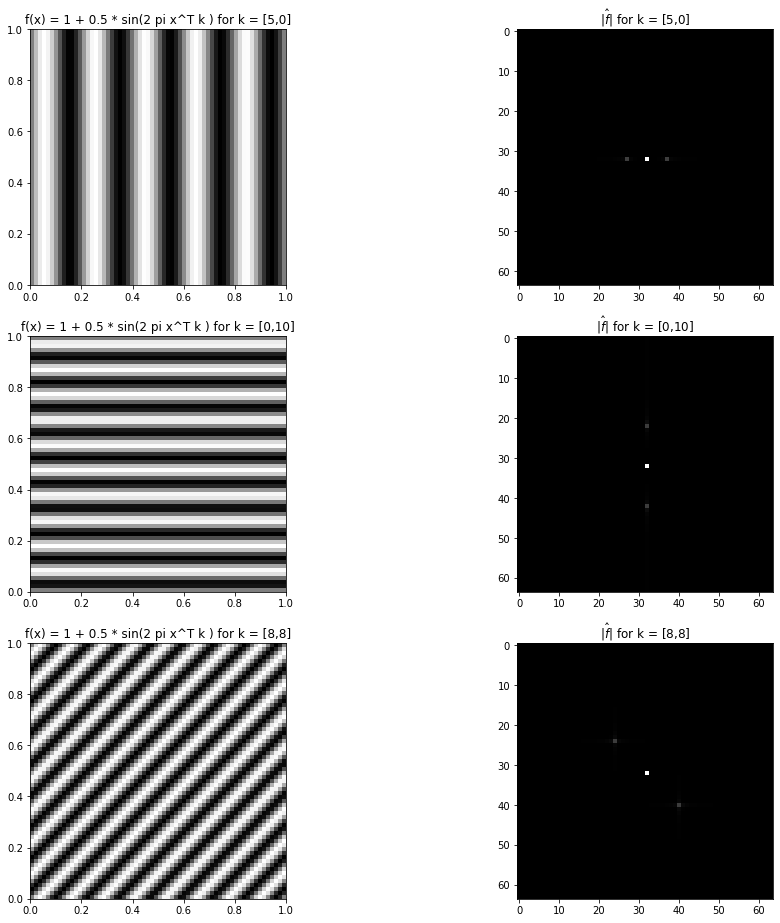

In [9]:
def f(x,y,k):
    '''
    a function that gives us the array of the mulitvariable function f 
    input:
        - x: x-values 
        - y: y-values 
        - k: k-values 
    output:
        - values of the multivariable function 
    '''
    xx, yy = np.meshgrid(x,y)
    return 1 + 1/2 * np.sin(2 * np.pi *(xx*k[0] + yy*k[1]))

#generate field we want to plot on 
x = np.linspace(0,1,64)
y = np.linspace(0,1,64)

#k-values 
k1 = np.array([5,0])
k2 = np.array([0,10])
k3 = np.array([8,8])

#plot f with different k
fig,ax = plt.subplots(3,2, figsize =(16,16))
ax[0,0].imshow(f(x,y, k1), extent = [0,1,0,1], cmap = 'gray')
ax[0,0].set_title('f(x) = 1 + 0.5 * sin(2 pi x^T k ) for k = [5,0]')
ax[0,1].imshow(abs(fftshift(fft2(f(x,y,k1),(64,64)))), cmap = 'gray')
ax[0,1].set_title(r'|$\hat{f}$| for k = [5,0]')

ax[1,0].imshow(f(x,y, k2), extent = [0,1,0,1], cmap = 'gray')
ax[1,0].set_title('f(x) = 1 + 0.5 * sin(2 pi x^T k ) for k = [0,10]')
ax[1,1].imshow(abs(fftshift(fft2(f(x,y,k2),(64,64)))), cmap = 'gray')
ax[1,1].set_title(r'|$\hat{f}$| for k = [0,10]')

ax[2,0].imshow(f(x,y, k3), extent = [0,1,0,1], cmap = 'gray')
ax[2,0].set_title('f(x) = 1 + 0.5 * sin(2 pi x^T k ) for k = [8,8]')
ax[2,1].imshow(abs(fftshift(fft2(f(x,y,k3),(64,64)))),  cmap = 'gray')
ax[2,1].set_title(r'|$\hat{f}$| for k = [8,8]')

We see that for the plot of $f(\mathbf{x})$ we get this wave pattern with direction corrensponding to $\mathbf{k}$. For $\mathbf{k} = (5,0)^T$ we have horisontal direction, $\mathbf{k} = (0,8)^T$ we have vertical direction and for $\mathbf{k} = (8,8)$ we have diagonal direction. And all the DFT all get an amplitude in the center. 

### Task 2 c

Now we want to look at the Dirichlet kernel in the 2D-case. We want to make a filter that removes certain frequencies or data from an image that are superficial. And the 2D kernel is defined as the following:
$$
D_{N}(\mathbf{x})= D_{N_1}(x_2)D_{N_2}(x_2)
$$
And discretely:
$$
D_{N}(\mathbf{x}_{i,j})= \left( D_{N_1}(x_i)D_{N_2}(x_j)\right)_{i,j = 0}^{(N_1,N_2)}
$$

When applying the filter to an image we take the idea from signal processing. We take the multivariable DFT of the image and elementwise mutliply it with the 2D Dirichlet kernel and use the inverse DFT of this new matrix to get the filtered image back. 

In [10]:
def dirichlet_filter(x_shape, y_shape, Nx = 64,Ny=64):
    '''
    a function that gives us the fourier coefficients of a 2D-dirichlet kernel
    input:
        - x_shape: length of filter in x-dimension 
        - y_shape: length of filter in y-dimension 
        - Nx: tells us which Dirichlet kernel to use in x-dimension
        - Ny: tells us which Dirichlet kernel to use in y-dimension
    output:
        -d_matrix: a matrix with the the fourier coefficients of a 2D-dirichlet kernel
    '''
    #generate first dirichlet kernel
    d1_hat = np.zeros(x_shape) 
    d1_hat[int(x_shape/2-Nx-1):int(x_shape/2+Nx)] = 1
    
    #generate second dirichlet kernel
    d2_hat = np.zeros(y_shape)
    d2_hat[int(y_shape/2-Ny-1):int(y_shape/2+Ny)] = 1

    #generate dirichlet matrix
    d_matrix = np.zeros((x_shape,y_shape))
    for i in range(x_shape):
        for j in range(y_shape):
            d_matrix[i, j] = d1_hat[i]*d2_hat[j]
    return d_matrix
    

In [11]:
from PIL import Image #import library open images 
#read the image, convert to array and find DFT 
barbara = Image.open('barbara.gif') 
barbara_data = np.array(barbara.convert('L'))
barbara_fft = fft2(barbara_data)

We have some other filters that we want to test on `barbara.gif`
$$
\begin{pmatrix}0 & -1 & 0\\ -1 & 4 & -1 \\ 0 & -1 & 0 \end{pmatrix}, \quad 
\begin{pmatrix}-1 & 2 & -1\\ -1 & 2 & -1 \\ -1 & 2 & -1 \end{pmatrix}, \quad 
\begin{pmatrix}-1 & -1 & -1\\ 2 & 2 & 2 \\ -1 & -1 & -1 \end{pmatrix}
$$
With zeros extended to the same size as the image we want to filter. 

Text(0.5, 1.0, 'Barbara with filter3')

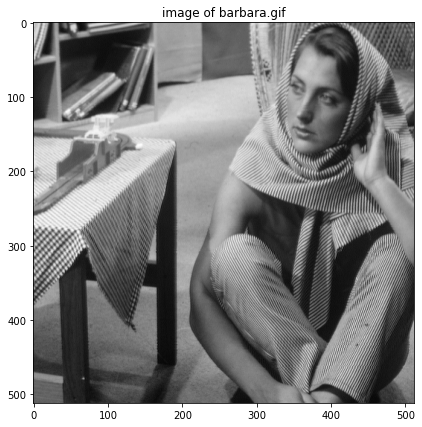

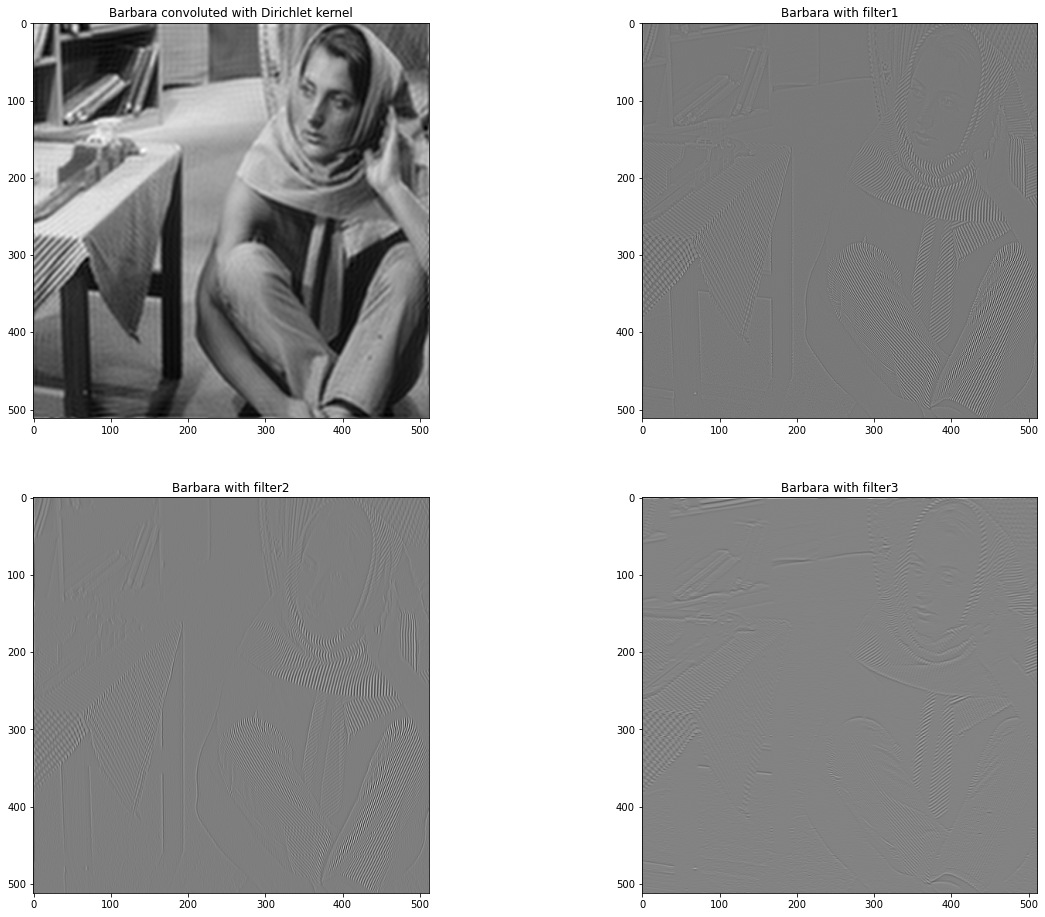

In [12]:
x_shape, y_shape = np.shape(barbara_data) #get shape of matrix 
filter1 = np.zeros((x_shape, y_shape)) #generate filter1
filter1[0,1], filter1[1,0], filter1[1, 2], filter1[2,1], filter1[1,1] = -1, -1, -1, -1, 4 #set values 

filter2 = np.zeros((x_shape, y_shape))#generate filter2
filter2[0,0], filter2[1,0], filter2[2,0], filter2[0,2], filter2[1,2], filter2[2,2] = -1, -1, -1, -1, -1, -1
filter2[0,1], filter2[1,1], filter2[2,1] = 2, 2, 2

filter3 = filter2.T #see that filter3 is just the transpose of filter2 

#find DFT of filter1, filter2, filter3, and dirichlet 
filter1_fft = fft2(filter1)
filter2_fft = fft2(filter2)
filter3_fft = fft2(filter3)
dirichlet_fft = dirichlet_filter(x_shape,y_shape)

#plot barbare without changes 
plt.figure(figsize = (7,7))
plt.imshow(barbara_data, cmap='gray')
plt.title(f'image of barbara.gif')
fig,ax = plt.subplots(2,2, figsize=(20,16))

#plot barbara with the filters 
ax[0,0].imshow(np.abs(ifft2(fftshift(barbara_fft)*dirichlet_fft)), cmap='gray')
ax[0,0].set_title(f'Barbara convoluted with Dirichlet kernel')

ax[0,1].imshow(np.real(ifft2(barbara_fft*filter1_fft)), cmap='gray')
ax[0,1].set_title(f'Barbara with filter1')

ax[1,0].imshow(np.real(ifft2(barbara_fft*filter2_fft)), cmap='gray')
ax[1,0].set_title(f'Barbara with filter2')

ax[1,1].imshow(np.real(ifft2(barbara_fft*filter3_fft)), cmap='gray')
ax[1,1].set_title(f'Barbara with filter3')


We see that the dirichlet kernel makes `barbara.gif` more grainy and less detailed, but still see that it is barbara. We have removed information from the image, but in return have an easier array to store. 

For the first filter to the top right corner we have filtered out the outlines of the pictures. If you look carefully it is possible to spot some great details of Barbara

For the bottom left and right they do the same as the one on the top right, but less accurately and more grainy. I dont see any use of these two filters, but it is interesting to see that details of Barbara when convuloted with such small matrices. 

### Task 3d 

We now want to look at a picture `Yarimton-dithered.png`. We see that it is printed in "half-toning" and has some peculiar dots. We want to remove these. We will use the Dirichlet kernel for this. Since Dirichlet removes unnecessarily information from the picture and smoothes it out.

In [13]:
def remove_dots(image_name):
    '''
    function that removes dots from half-toning images using the dirichlet kernel 
    
    input:
        - image_name: image we want to filter 

    output:
        - image_data: values of the image used to plotting the image 
        - image_filtered: the image after dirichlet kernel has been used as a filter 
        - image_fft: the discrete Fourier transform of the image 
        - image_conv_fft: the discrete Fourier transform of the convolution between image ande filter 
    '''
    #read image, convert to array , take DFT and log of DFT 
    image = Image.open(image_name).convert("L")
    image_data = np.array(image)
    image_fft = fftshift(fft2(image_data))
    log_amplitude = np.log(abs(image_fft))
    
    x_shape, y_shape = np.shape(image_data)    #extract shape 
    d_matrix = dirichlet_filter(x_shape, y_shape) #make dirichlet kernel 

    image_conv_fft = image_fft*d_matrix #element wise multiplication 
    image_filtered = np.abs(ifft2(fftshift(image_conv_fft))) #find convolution 
    #return image, the filtered image and dft of image
    return image_data, image_filtered, image_fft

Text(0.5, 1.0, 'logarithm of the DFT amplitude on Yarimton-dithered.png ')

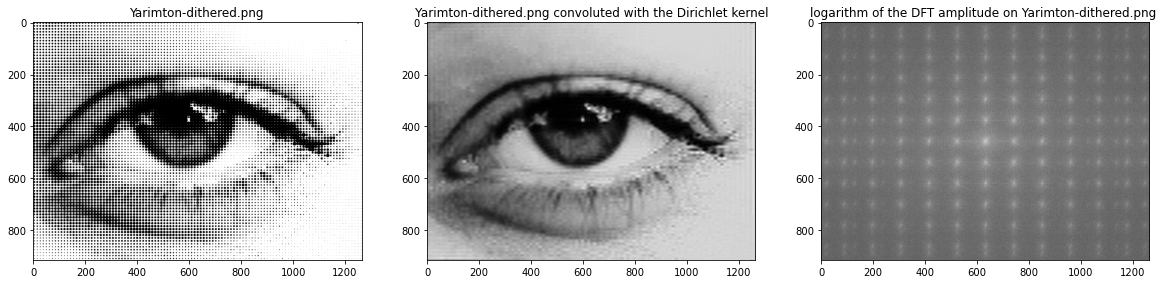

In [14]:
#get yarimton image, filtered yarimton image and dft of yarimton image 
yarimton, yarimton_filtered, yarimton_fft = remove_dots('Yarimton-dithered.png') 

#plot yarimton image, filtered yarimton image and log of DFT of yarimton image 
fig,ax = plt.subplots(1,3, figsize=(20,10))

ax[0].imshow(yarimton, cmap ='gray')
ax[0].set_title('Yarimton-dithered.png')

ax[1].imshow(yarimton_filtered, cmap ='gray')
ax[1].set_title('Yarimton-dithered.png convoluted with the Dirichlet kernel')

ax[2].imshow(np.log(np.abs(yarimton_fft)), cmap ='gray')
ax[2].set_title('logarithm of the DFT amplitude on Yarimton-dithered.png ')


The 2D-dirichlet kernel removes the dots and smoothes out the picture. In my opinion it looks better after applying the filter. On the right side we see that the DFT of `Yarimton-dithered.png` has many peaks and there for many "frequencies" that can be removed without loosing to much information in the picture.


We now want to use the Dirichlet Kernel on `munkholmen-dithered.png` and `lighthouse-dithered.png` 

Text(0.5, 1.0, 'logarithm of the DFT amplitude on lighthouse-dithered.png ')

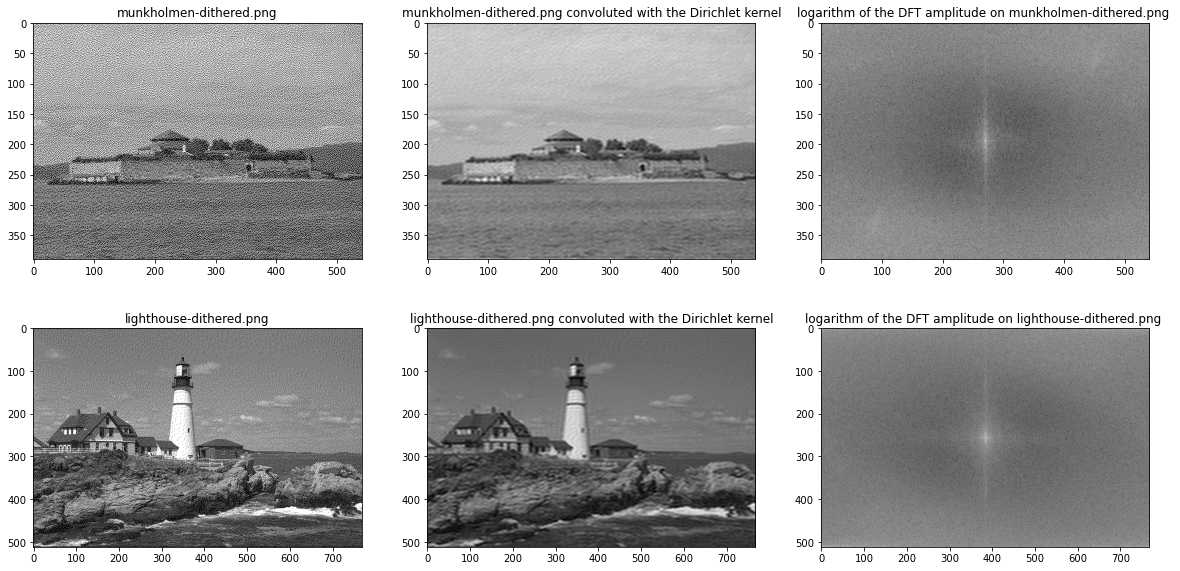

In [15]:
#get munkholmen image, filtered munkholmen image and dft of munkholmen image 
munkholmen, munkholmen_filtered, munkholmen_fft = remove_dots('munkholmen-dithered.png')
#get lighthouse image, filtered munlighthousekholmen image and dft of lighthouse image 
lighthouse, lighthouse_filtered, lighthouse_fft = remove_dots('lighthouse-dithered.png')

#plot the images, filtered images and the log of DFT of the images 
fig,ax = plt.subplots(2,3, figsize=(20,10))

ax[0,0].imshow(munkholmen, cmap ='gray')
ax[0,0].set_title('munkholmen-dithered.png')

ax[0,1].imshow(munkholmen_filtered, cmap ='gray')
ax[0,1].set_title('munkholmen-dithered.png convoluted with the Dirichlet kernel')

ax[0,2].imshow(np.log(np.abs(munkholmen_fft)), cmap ='gray')
ax[0,2].set_title('logarithm of the DFT amplitude on munkholmen-dithered.png ')

ax[1,0].imshow(lighthouse, cmap ='gray')
ax[1,0].set_title('lighthouse-dithered.png')

ax[1,1].imshow(lighthouse_filtered, cmap ='gray')
ax[1,1].set_title('lighthouse-dithered.png convoluted with the Dirichlet kernel')

ax[1,2].imshow(np.log(np.abs(lighthouse_fft)), cmap ='gray')
ax[1,2].set_title('logarithm of the DFT amplitude on lighthouse-dithered.png ')

The Dirichlet kernel removes the dots from the pictures and smoothes out the color, but the cost of this is a much more unclear and grainy picture. If we look at the DFT we see that there are much fewer peaks than for `Yarimton-dithered.png` so the Dirichlet kernel is not the best suited for removing dots from theese kinds of pictures. If we look at the non filtered pictures, the dots in `Yarimton-dithered.png` are much more signficant then those in `munkholmen-dithered.png` and `lighthouse-dithered.png`. 